In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import sys
import random
import joblib
import json 

import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt

import scipy
import seaborn as sns
from types import SimpleNamespace
from collections import Counter

import torch
from statannot import add_stat_annotation

# How do the effect of perturbations change based on what type of cell is perturbed?

In [9]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/islet_cells2/"
filenames=os.listdir(base_dir)
filenames.sort()

In [10]:
filenames=[filenames[4],filenames[3], filenames[0], filenames[2], filenames[1]]

In [11]:
file_indices=[16,19,1,22,4,10,25,28,7]
differences=[]
paired_t=[]
beta_dist = []
for i in range(len(file_indices)):
    for elt in filenames:
        files=os.listdir(base_dir+elt)
        files.sort()
        results=torch.load(base_dir+elt+"/"+files[file_indices[i]])

        beta_counts_std = []
        for labs in results["unperturbed_labs"]:
            beta_counts_std.append(Counter(labs[-1])["sc_beta"]/200)
        beta_counts_perturb = []
        for labs in results["perturbed_labs"]:
            beta_counts_perturb.append(Counter(labs[-1])["sc_beta"]/200)

        #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
        differences.append(np.array(beta_counts_perturb)-np.array(beta_counts_std))

In [12]:
beta_dict={}
k=0
for i in range(len(file_indices)):
    for j in range(len(filenames)):
        beta_dict[files[file_indices[i]].split("_")[0]+"_"+str(filenames[j])]=differences[k]
        k+=1

In [13]:
beta_diff=pd.DataFrame(beta_dict).melt()
beta_diff["gene"] = beta_diff["variable"].apply(lambda x: str(x.split("_")[0]))
beta_diff["sampled cell"] = beta_diff["variable"].apply(lambda x: x.split("_")[1]+x.split("_")[2])

Text(0.5, 0, 'Perturbed gene')

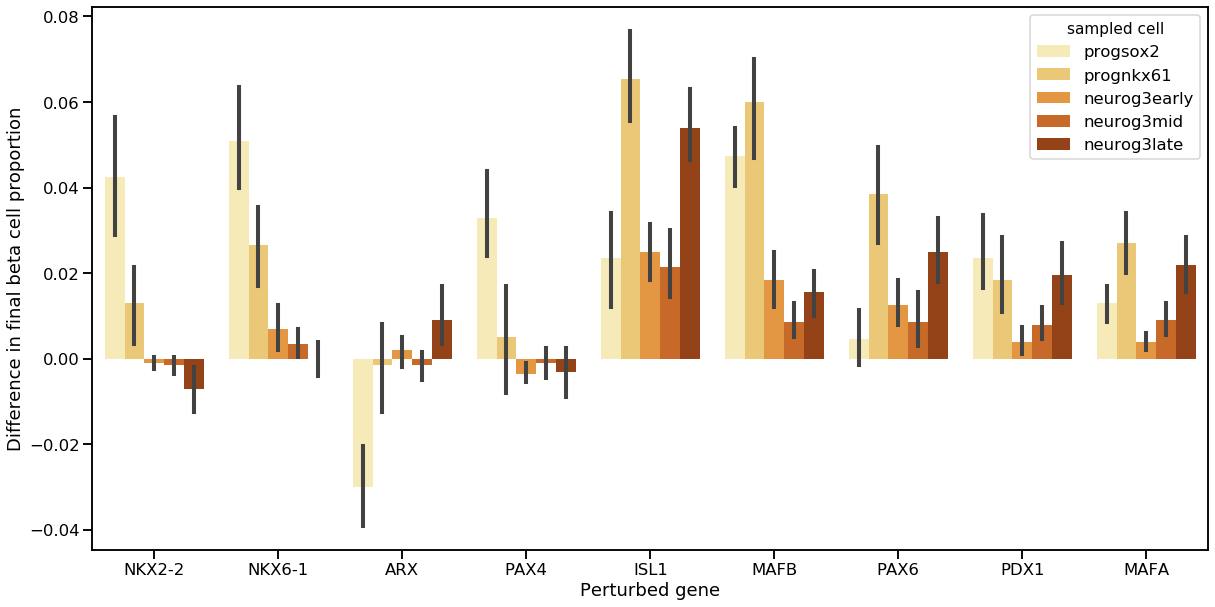

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.bar(np.arange(0,8,1),differences)
sns.set_context("talk")
g=sns.barplot(data=beta_diff, x="gene", y="value", hue="sampled cell", palette="YlOrBr")
g.set_ylabel("Difference in final beta cell proportion")
g.set_xlabel("Perturbed gene")

In [152]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/islet_cells2/"
filenames=os.listdir(base_dir)
filenames.sort()

In [153]:
filenames=[filenames[4],filenames[3], filenames[0], filenames[2], filenames[1]]

In [154]:
file_indices=[16,19,1,22,4,10,25,28,7]
differences=[]
paired_t=[]
beta_dist = []
for i in range(len(file_indices)):
    for elt in filenames:
        files=os.listdir(base_dir+elt)
        files.sort()
        results=torch.load(base_dir+elt+"/"+files[file_indices[i]])

        beta_counts_std = []
        for labs in results["unperturbed_labs"]:
            beta_counts_std.append(Counter(labs[-1])["sc_beta"]/200)
        beta_counts_perturb = []
        for labs in results["perturbed_labs"]:
            beta_counts_perturb.append(Counter(labs[-1])["sc_beta"]/200)

        #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
        differences.append(np.array(beta_counts_perturb)-np.array(beta_counts_std))

In [155]:
differences[6]

array([0.025, 0.035, 0.05 , 0.045, 0.03 , 0.02 , 0.   , 0.005, 0.025,
       0.03 ])

In [156]:
beta_dict={}
k=0
for i in range(len(file_indices)):
    for j in range(len(filenames)):
        beta_dict[files[file_indices[i]].split("_")[0]+"_"+str(filenames[j])]=differences[k]
        k+=1

In [157]:
beta_diff=pd.DataFrame(beta_dict).melt()
beta_diff["gene"] = beta_diff["variable"].apply(lambda x: str(x.split("_")[0]))
beta_diff["sampled cell"] = beta_diff["variable"].apply(lambda x: str(x.split("_")[1]))

Text(0.5, 0, 'Initial cell population (introduction of silico perturbation)')

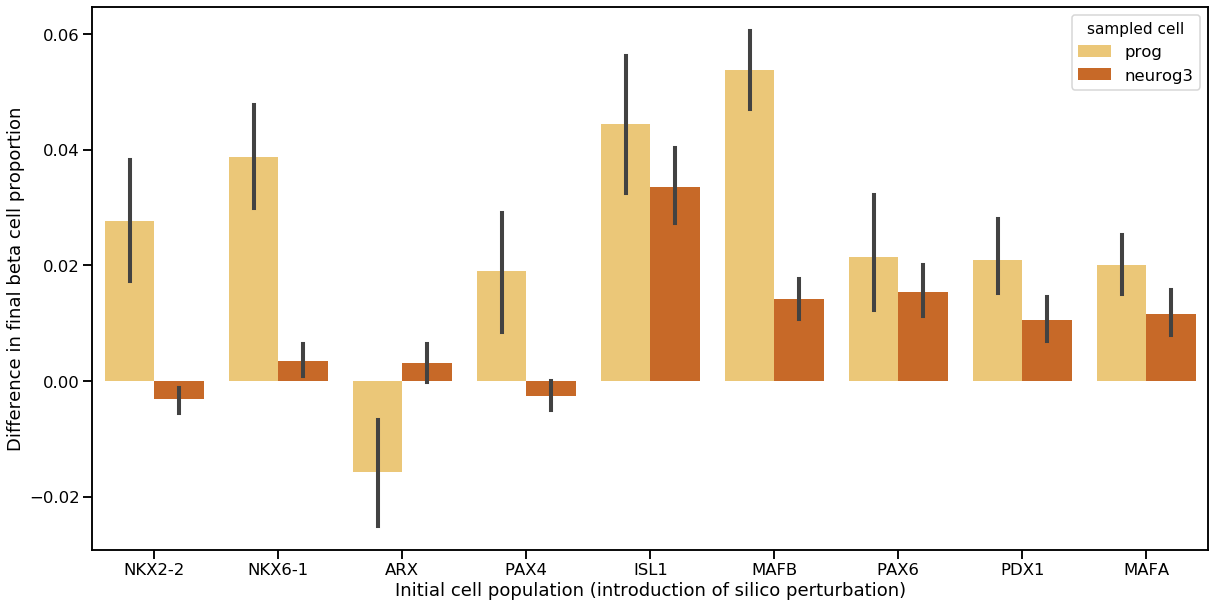

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.bar(np.arange(0,8,1),differences)
sns.set_context("talk")
g=sns.barplot(data=beta_diff, x="gene", y="value", hue="sampled cell", palette="YlOrBr")
g.set_ylabel("Difference in final beta cell proportion")
g.set_xlabel("Initial cell population (introduction of silico perturbation)")

In [2]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/islet_cells2/"
filenames=os.listdir(base_dir)
filenames.sort()

In [3]:
filenames=[filenames[4],filenames[3], filenames[0], filenames[2], filenames[1]]

In [4]:
file_indices=[16,19,1,22,4,10,25,28,7]
differences=[]
paired_t=[]
beta_dist = []
for i in range(len(file_indices)):
    for elt in filenames:
        files=os.listdir(base_dir+elt)
        files.sort()
        results=torch.load(base_dir+elt+"/"+files[file_indices[i]])

        beta_counts_std = []
        for labs in results["unperturbed_labs"]:
            beta_counts_std.append(Counter(labs[-1])["sc_alpha"]/200)
        beta_counts_perturb = []
        for labs in results["perturbed_labs"]:
            beta_counts_perturb.append(Counter(labs[-1])["sc_alpha"]/200)

        #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
        differences.append(np.array(beta_counts_perturb)-np.array(beta_counts_std))

In [5]:
beta_dict={}
k=0
for i in range(len(file_indices)):
    for j in range(len(filenames)):
        beta_dict[files[file_indices[i]].split("_")[0]+"_"+str(filenames[j])]=differences[k]
        k+=1

In [6]:
beta_diff=pd.DataFrame(beta_dict).melt()
beta_diff["gene"] = beta_diff["variable"].apply(lambda x: str(x.split("_")[0]))
beta_diff["sampled cell"] = beta_diff["variable"].apply(lambda x: x.split("_")[1]+x.split("_")[2])

Text(0.5, 0, 'Perturbed gene')

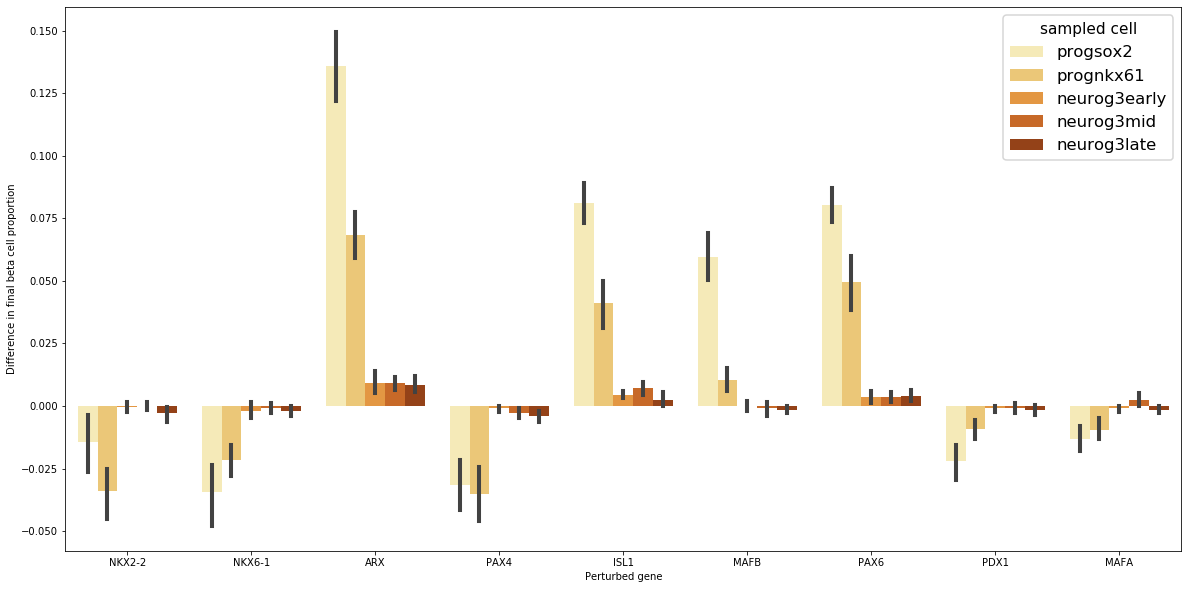

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.bar(np.arange(0,8,1),differences)
sns.set_context("talk")
g=sns.barplot(data=beta_diff, x="gene", y="value", hue="sampled cell", palette="YlOrBr")
g.set_ylabel("Difference in final beta cell proportion")
g.set_xlabel("Perturbed gene")

In [152]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/islet_cells2/"
filenames=os.listdir(base_dir)
filenames.sort()

In [153]:
filenames=[filenames[4],filenames[3], filenames[0], filenames[2], filenames[1]]

In [154]:
file_indices=[16,19,1,22,4,10,25,28,7]
differences=[]
paired_t=[]
beta_dist = []
for i in range(len(file_indices)):
    for elt in filenames:
        files=os.listdir(base_dir+elt)
        files.sort()
        results=torch.load(base_dir+elt+"/"+files[file_indices[i]])

        beta_counts_std = []
        for labs in results["unperturbed_labs"]:
            beta_counts_std.append(Counter(labs[-1])["sc_beta"]/200)
        beta_counts_perturb = []
        for labs in results["perturbed_labs"]:
            beta_counts_perturb.append(Counter(labs[-1])["sc_beta"]/200)

        #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
        differences.append(np.array(beta_counts_perturb)-np.array(beta_counts_std))

In [155]:
differences[6]

array([0.025, 0.035, 0.05 , 0.045, 0.03 , 0.02 , 0.   , 0.005, 0.025,
       0.03 ])

In [156]:
beta_dict={}
k=0
for i in range(len(file_indices)):
    for j in range(len(filenames)):
        beta_dict[files[file_indices[i]].split("_")[0]+"_"+str(filenames[j])]=differences[k]
        k+=1

In [157]:
beta_diff=pd.DataFrame(beta_dict).melt()
beta_diff["gene"] = beta_diff["variable"].apply(lambda x: str(x.split("_")[0]))
beta_diff["sampled cell"] = beta_diff["variable"].apply(lambda x: str(x.split("_")[1]))

Text(0.5, 0, 'Initial cell population (introduction of silico perturbation)')

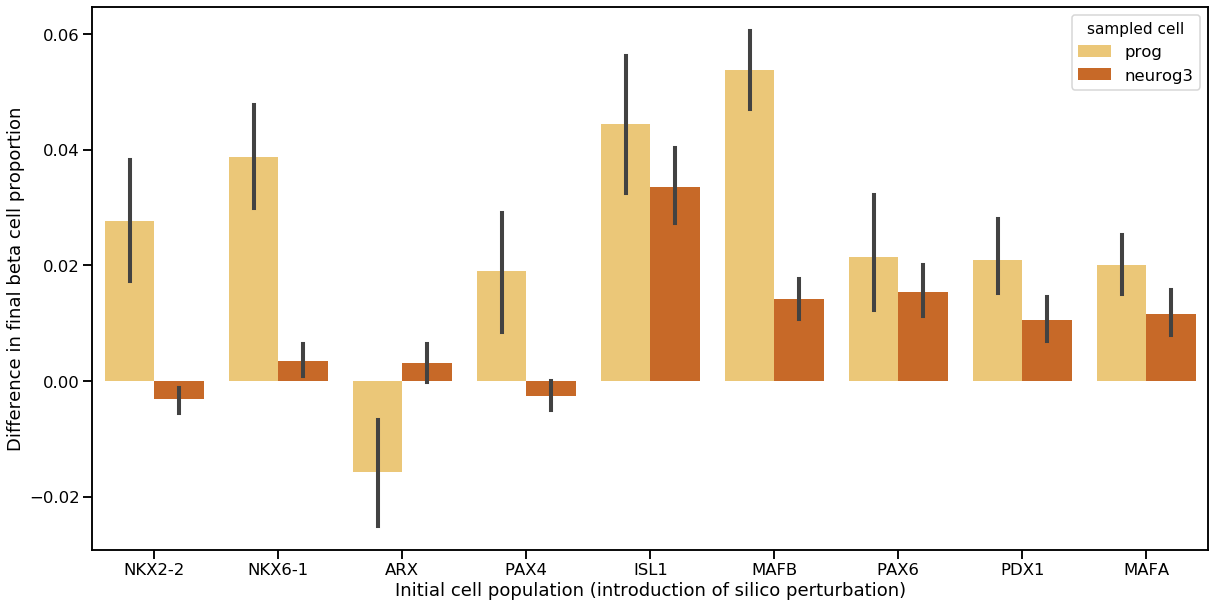

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.bar(np.arange(0,8,1),differences)
sns.set_context("talk")
g=sns.barplot(data=beta_diff, x="gene", y="value", hue="sampled cell", palette="YlOrBr")
g.set_ylabel("Difference in final beta cell proportion")
g.set_xlabel("Initial cell population (introduction of silico perturbation)")

# In unperturbed simulations, where do all the cell types arise from?

In [152]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/islet_cells2/"
filenames=os.listdir(base_dir)
filenames.sort()

In [153]:
filenames=[filenames[4],filenames[3], filenames[0], filenames[2], filenames[1]]

In [154]:
file_indices=[16,19,1,22,4,10,25,28,7]
differences=[]
paired_t=[]
beta_dist = []
for i in range(len(file_indices)):
    for elt in filenames:
        files=os.listdir(base_dir+elt)
        files.sort()
        results=torch.load(base_dir+elt+"/"+files[file_indices[i]])

        beta_counts_std = []
        for labs in results["unperturbed_labs"]:
            beta_counts_std.append(Counter(labs[-1])["sc_beta"]/200)
            
        alpha_counts_std = []
        for labs in results["unperturbed_labs"]:
            alpha_counts_std.append(Counter(labs[-1])["sc_alpha"]/200)

        #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
        differences.append(np.array(beta_counts_perturb)-np.array(beta_counts_std))

In [155]:
differences[6]

array([0.025, 0.035, 0.05 , 0.045, 0.03 , 0.02 , 0.   , 0.005, 0.025,
       0.03 ])

In [156]:
beta_dict={}
k=0
for i in range(len(file_indices)):
    for j in range(len(filenames)):
        beta_dict[files[file_indices[i]].split("_")[0]+"_"+str(filenames[j])]=differences[k]
        k+=1

In [157]:
beta_diff=pd.DataFrame(beta_dict).melt()
beta_diff["gene"] = beta_diff["variable"].apply(lambda x: str(x.split("_")[0]))
beta_diff["sampled cell"] = beta_diff["variable"].apply(lambda x: str(x.split("_")[1]))

Text(0.5, 0, 'Initial cell population (introduction of silico perturbation)')

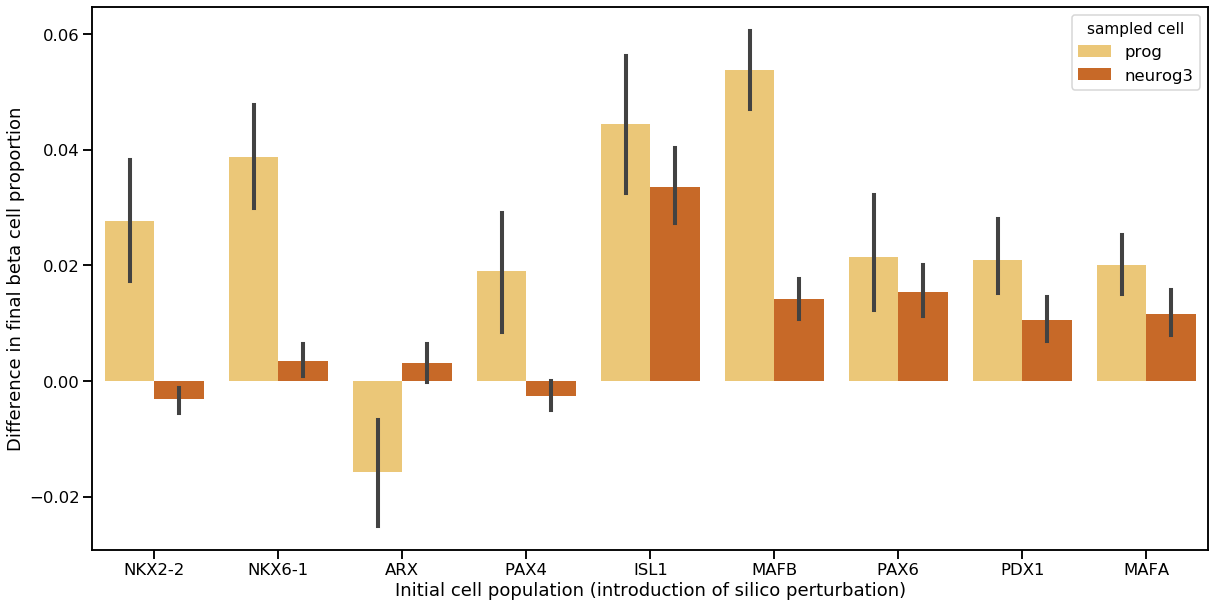

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.bar(np.arange(0,8,1),differences)
sns.set_context("talk")
g=sns.barplot(data=beta_diff, x="gene", y="value", hue="sampled cell", palette="YlOrBr")
g.set_ylabel("Difference in final beta cell proportion")
g.set_xlabel("Initial cell population (introduction of silico perturbation)")